# Statistical Techniques for Data Analysis CA2

# <span style='color:purple'> First Section </span>

# 1) Understanding the data

This dataset shows the IMDB feature films & documentaries and actors for approximately 41050 films. This dataset contains information of movies from the early 1900 to 2021 and, once again highlighting the mathematical part of it, only films/docs with at least 100 IMDB votes were counted

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import r2_score 
import scipy.stats as stats
%pylab inline
import matplotlib.image as mpimg
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
from scipy.stats import f

Populating the interactive namespace from numpy and matplotlib


/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
df=pd.read_csv("data/actorfilms.csv")

After bringing the libraries and reading the data, we have a look at the disposal of the information in out dataframe:

In [3]:
df.head(5)

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664


We then have a dataset with 191873 rows and 7 columns, containing information about actors, actors ID, films, release year, rating and film ID.

In [4]:
df.shape

(191873, 7)

Now we can see what type of data we have and it also gives us the breakdown of our data observations, type of coluns, number of observation for each column, null columns etc:

In [5]:
df.dtypes

Actor       object
ActorID     object
Film        object
Year         int64
Votes        int64
Rating     float64
FilmID      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191873 entries, 0 to 191872
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Actor    191873 non-null  object 
 1   ActorID  191873 non-null  object 
 2   Film     191873 non-null  object 
 3   Year     191873 non-null  int64  
 4   Votes    191873 non-null  int64  
 5   Rating   191873 non-null  float64
 6   FilmID   191873 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 10.2+ MB


Lets create a list of possible missing values and then read the dataset considering it:

In [7]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--",'nan','NaN']
df= pd.pandas.read_csv('data/actorfilms.csv', na_values = missing_value_formats)

We now test it through our function isnull and we verify that our dataset doens't have any missing value:

In [8]:
print(df.isnull().sum())

Actor      0
ActorID    0
Film       0
Year       0
Votes      0
Rating     0
FilmID     0
dtype: int64


Let's now see what previous information our numerical e categorial data bring to us, separately:

In [9]:
# Checking Numerical Data
numerical= df.select_dtypes(include=['int64','float64']).columns
numerical

Index(['Year', 'Votes', 'Rating'], dtype='object')

<Figure size 432x288 with 0 Axes>

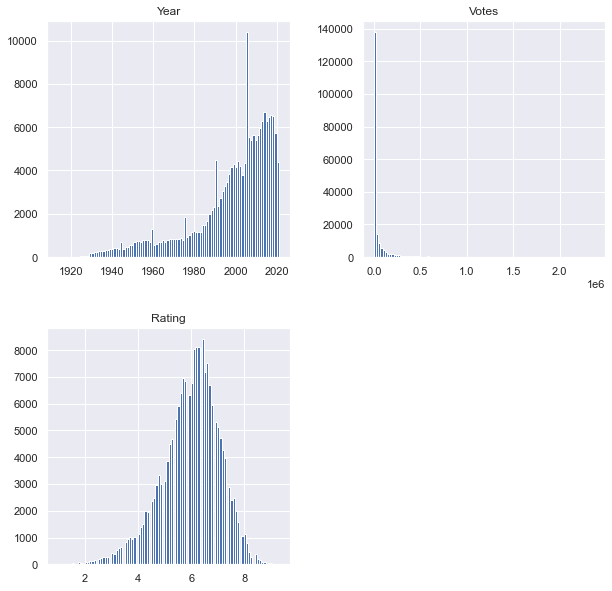

In [10]:
plt.figure()
df.hist(bins= 100,figsize = (10,10))
plt.show()

In [11]:
# Checking Categorical Data
categorical= df.select_dtypes(include=['object']).columns
categorical

Index(['Actor', 'ActorID', 'Film', 'FilmID'], dtype='object')

In [12]:
print('The variable Actor has {} unique values'.format(len(df['Actor'].unique())))
print('The variable Film has {} unique values'.format(len(df['Film'].unique())))

The variable Actor has 9615 unique values
The variable Film has 41050 unique values


We can notice here that some actors might appear multiple times as it is related to the different films they have played in:

In [13]:
df["Actor"].value_counts()

Anupam Kher          237
Eric Roberts         221
Danny Trejo          194
Amitabh Bachchan     188
John Carradine       186
                    ... 
Simmone Mackinnon      1
Rachel Shenton         1
Dakota Taylor          1
Gina Stiebitz          1
Gus Kenworthy          1
Name: Actor, Length: 9615, dtype: int64

We can also check the amount of film per year in our data and then understand which years we have more significant amount of information:

In [14]:
df["Year"].value_counts()

2014    6716
2017    6565
2018    6494
2016    6467
2013    6290
        ... 
1914       6
1917       5
1918       2
1915       2
1916       1
Name: Year, Length: 108, dtype: int64

<b>1.1 Numerical and Categorial Relationship</b>

This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots:

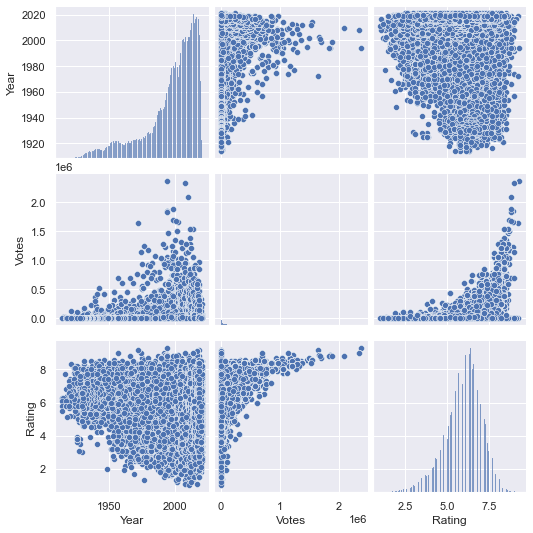

In [15]:
sns.pairplot(df)

<b>1.2 Detecting outliers</b>

An Outlier is any data point that lies below the lower bound and above the upper bound. Let's ckeck it on our numerical variables:

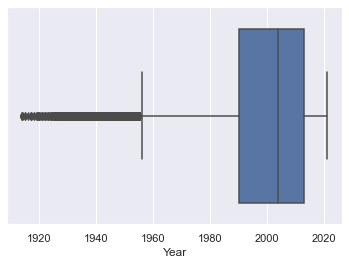

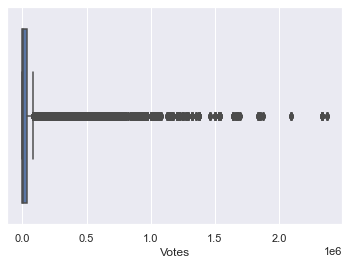

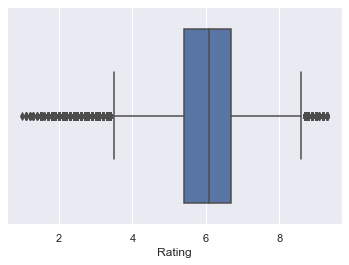

In [16]:
import warnings
warnings.filterwarnings('ignore')

for col in numerical:
    sns.boxplot(df[col])
    plt.show() 

In regards to our dataset, we have a clear visualization of the data point (or points) located outside the whiskers of the box plot for our variable Year, which certainly influences the other variables.

# 2) Exploring and manipulating the data

Thought the analysis of the pairplot and the boxplot, it is possible to make sure that the most relevant part of our dataset in concentrated from the year 2000. This analysis so far leads us to manipulate which information are in fact important to carry on our following analysis. 
Based on that, let’s keep our data with information from the past 10 year, when we can relate to the full potential of filming technologies

In [17]:
df_new=df.loc[(df["Year"]>2011)]

Considering this, we then filter our dataset to bring us all the information greater than 2011, which shows as a database with 54921 rows and 7 columns, containing information from 2012 to 2021:

In [18]:
df_new.shape

(54921, 7)

Let's now explore the "new" data:

In [19]:
df_new.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
39,Lauren Bacall,nm0000002,Ernest & Celestine,2012,18793,7.9,tt1816518
40,Lauren Bacall,nm0000002,The Forger,2012,4472,5.4,tt1368858
1856,Sophia Loren,nm0000047,The Life Ahead,2020,10059,6.8,tt10627584
3506,Raquel Welch,nm0000079,How to Be a Latin Lover,2017,14516,6.0,tt4795124
3675,Gong Li,nm0000084,Mulan,2020,116927,5.6,tt4566758


Types reamains the same:

In [20]:
df_new.dtypes

Actor       object
ActorID     object
Film        object
Year         int64
Votes        int64
Rating     float64
FilmID      object
dtype: object

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54921 entries, 39 to 191872
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Actor    54921 non-null  object 
 1   ActorID  54921 non-null  object 
 2   Film     54921 non-null  object 
 3   Year     54921 non-null  int64  
 4   Votes    54921 non-null  int64  
 5   Rating   54921 non-null  float64
 6   FilmID   54921 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.4+ MB


Checking the amount of film per year once again:

In [22]:
df_new["Year"].value_counts()

2014    6716
2017    6565
2018    6494
2016    6467
2013    6290
2015    6273
2012    5962
2019    5744
2020    3581
2021     829
Name: Year, dtype: int64

In [23]:
df_new["Actor"].value_counts()

Eric Roberts          129
Danny Trejo            79
Tom Sizemore           62
Mindy Robinson         54
James Franco           52
                     ... 
Alex Hogh Andersen      1
Gavin Stenhouse         1
Armaan Ralhan           1
James Bolam             1
Cristina Umana          1
Name: Actor, Length: 7919, dtype: int64

In [24]:
df_new["Film"].value_counts()

Avengers: Endgame                                68
Avengers: Infinity War                           49
Movie 43                                         47
Star Wars: Episode IX - The Rise of Skywalker    47
The Twilight Saga: Breaking Dawn - Part 2        46
                                                 ..
The Brand New Testament                           1
Out in the Open                                   1
Capital                                           1
Claire Darling                                    1
Son of Sardaar                                    1
Name: Film, Length: 11670, dtype: int64

Let's check the relationship between Actor and Rating:

In [25]:
round(df_new.groupby('Actor')['Rating'].mean().sort_values(ascending=False).iloc[:10],1)

Actor
Roger Lloyd Pack      8.9
Beatie Edney          8.6
Harry Styles          8.5
Don Stroud            8.4
Mia McKenna-Bruce     8.4
John Mulaney          8.4
Dennis Christopher    8.2
Jessie Mei Li         8.2
Daisy Waterstone      8.2
Eriq La Salle         8.1
Name: Rating, dtype: float64

<b>2.1 How about outliers for the other numerical variables?</b>

These other variables – Rating and Votes – didn’t really have any trimming step as, according to the IMDb website, IMDb ratings are “accurate” in the sense that they are calculated using a consistent, unbiased formula (IMDb, 2021).

In [26]:
# Checking Numerical Data
numerical= df_new.select_dtypes(include=['int64','float64']).columns
numerical

Index(['Year', 'Votes', 'Rating'], dtype='object')

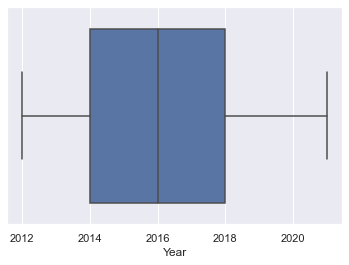

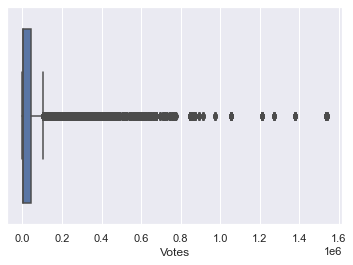

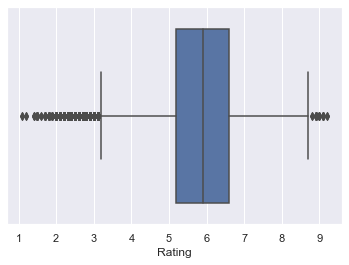

In [27]:
import warnings
warnings.filterwarnings('ignore')

for col in numerical:
    sns.boxplot(df_new[col])
    plt.show() 

In [28]:
print("Highest allowed",df_new['Votes'].mean() + 3*df_new['Votes'].std())
print("Lowest allowed",df_new['Votes'].mean() - 3*df['Votes'].std())

Highest allowed 492112.8358083849
Lowest allowed -359230.2856347643


In [29]:
print("Highest allowed",df_new['Rating'].mean() + 3*df_new['Rating'].std())
print("Lowest allowed",df_new['Rating'].mean() - 3*df['Rating'].std())

Highest allowed 9.217884391170127
Lowest allowed 2.5568789907956795


In [30]:
#finding the ourliers
df_new[(df_new['Votes'] > 492112.8358083849) | (df_new['Votes'] < -359230.2856347643)]

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
3783,Brad Pitt,nm0000093,Once Upon a Time... In Hollywood,2019,569358,7.6,tt7131622
3791,Brad Pitt,nm0000093,12 Years a Slave,2013,647726,8.1,tt2024544
3792,Brad Pitt,nm0000093,World War Z,2013,606561,7.0,tt0816711
4277,Adrienne Barbeau,nm0000105,Argo,2012,577950,7.7,tt1024648
4402,Kenneth Branagh,nm0000110,Avengers: Infinity War,2018,860288,8.4,tt4154756
...,...,...,...,...,...,...,...
191726,Jacob Batalon,nm8188622,Avengers: Infinity War,2018,860288,8.4,tt4154756
191730,Jacob Batalon,nm8188622,Spider-Man: Homecoming,2017,523789,7.4,tt2250912
191731,Shaunette Renee Wilson,nm8189246,Black Panther,2018,638034,7.3,tt1825683
191761,Lilly Aspell,nm8412222,Wonder Woman,2017,584367,7.4,tt0451279


In [31]:
#finding the ourliers
df_new[(df_new['Rating'] > 9.217884391170127) | (df_new['Rating'] < 2.5568789907956795)]

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
4847,Tia Carrere,nm0000119,Showdown in Manila,2016,1678,2.4,tt4586626
5881,Cary Elwes,nm0000144,The Oogieloves in the Big Balloon Adventure,2012,14853,2.1,tt1520498
9765,Will Smith,nm0000226,Student of the Year 2,2019,16677,2.2,tt7255568
10675,Bruce Willis,nm0000246,Cosmic Sin,2021,3895,2.5,tt11762434
11961,Stephen Baldwin,nm0000286,2047: Sights of Death,2014,1382,2.4,tt3481210
...,...,...,...,...,...,...,...
188950,Mindy Robinson,nm4535518,Captain Battle: Legacy War,2013,442,1.2,tt2387413
189937,Kelvin Harrison Jr.,nm5123156,Gully,2019,1016,1.5,tt5013984
190090,Maddie Nichols,nm5239354,Inadmissible,2016,112,2.3,tt6137056
191296,Adam Elshar,nm6756764,Clown,2019,265,2.4,tt10380066


I decided to not trim these "outliers" as, according to the IMDb website, IMDb ratings are “accurate” in the sense that they are calculated using a consistent, unbiased formula, but we don't claim that IMDb ratings are “accurate” in an absolute qualitative sense. We offer these ratings as a simplified way to see what other IMDb users all over the world think about titles listed on our site.
 

# 3) Statistical aspects of the data

We then calculate the central tendency measures for the numerical data:

In [32]:
df_new.describe()

,Year,Votes,Rating
count,54921.000000,5.492100e+04,54921.000000
mean,2015.869467,5.862671e+04,5.840181
std,2.511667,1.444954e+05,1.125901
min,2012.000000,1.000000e+02,1.100000
25%,2014.000000,7.930000e+02,5.200000
50%,2016.000000,5.097000e+03,5.900000
75%,2018.000000,4.147800e+04,6.600000
max,2021.000000,1.538926e+06,9.200000


And for the categorial variable:

In [33]:
df_new.describe(include=object)

,Actor,ActorID,Film,FilmID
count,54921,54921,54921,54921
unique,7919,7924,11670,11974
top,Eric Roberts,nm0000616,Avengers: Endgame,tt4154796
freq,129,129,68,68


The easiest way to visualize how those numbers behave in the data so far is through its distribution and to plot it so, we will define our main target variable: Rating.
Note: it follows a normal distribution,

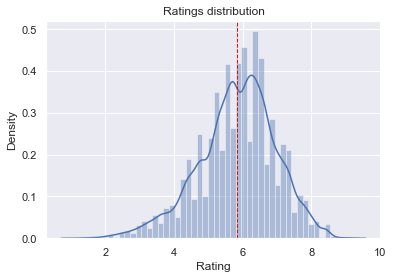

In [34]:
sns.distplot(df_new['Rating'])
plt.axvline(df_new['Rating'].values.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Ratings distribution');

<AxesSubplot:>

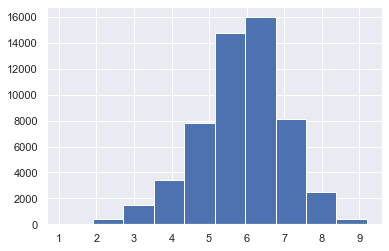

In [35]:
df_new["Rating"].hist()

Based on these plots, we are coming to an important subject: The Central Limit Theorem. This theorem implies that the distribution of the sample means always approximates to a normal distribution, irrespective of the type of distribution from which the sample is collected. 

We also have the Q-Q plot:

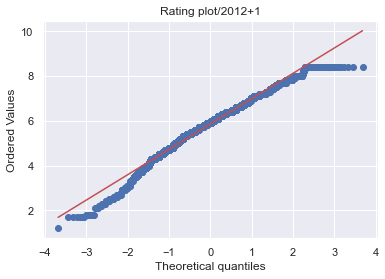

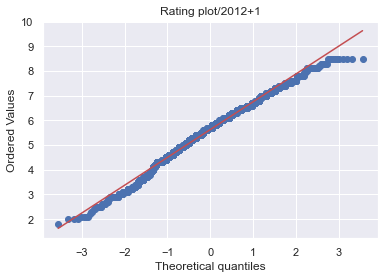

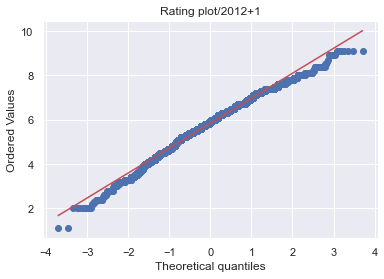

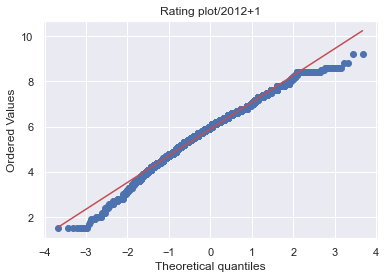

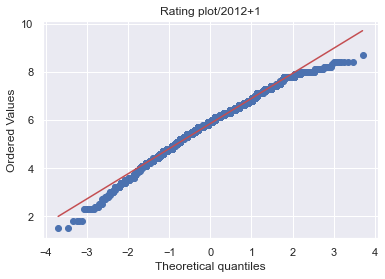

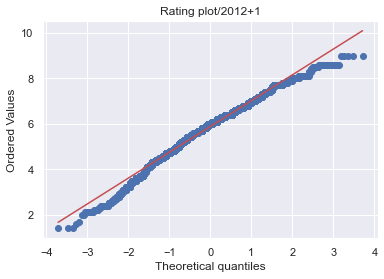

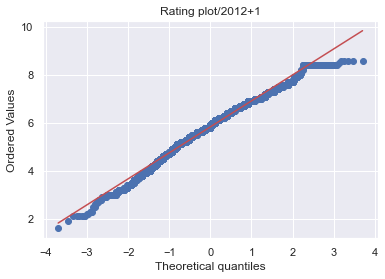

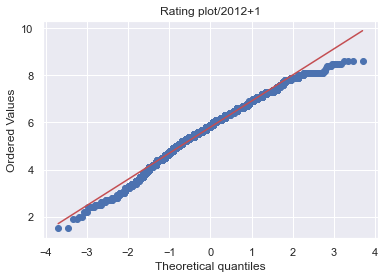

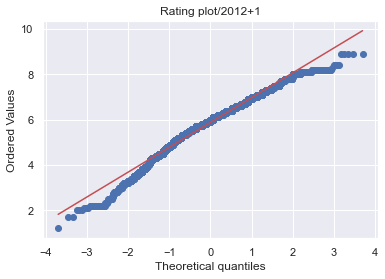

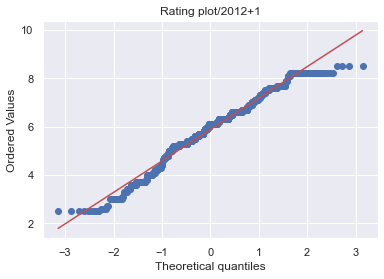

In [36]:
unique_Year = df_new['Year'].unique()
for Year in unique_Year:
    stats.probplot(df_new[df_new['Year'] == Year]['Rating'], dist="norm", plot=plt)
    plt.title("Rating plot/2012+1")
    plt.show()

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line.

# 4) Data visualisation

In [37]:
df_new

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
39,Lauren Bacall,nm0000002,Ernest & Celestine,2012,18793,7.9,tt1816518
40,Lauren Bacall,nm0000002,The Forger,2012,4472,5.4,tt1368858
1856,Sophia Loren,nm0000047,The Life Ahead,2020,10059,6.8,tt10627584
3506,Raquel Welch,nm0000079,How to Be a Latin Lover,2017,14516,6.0,tt4795124
3675,Gong Li,nm0000084,Mulan,2020,116927,5.6,tt4566758
...,...,...,...,...,...,...,...
191868,Roman Griffin Davis,nm9877392,Jojo Rabbit,2019,310904,7.9,tt2584384
191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254
191870,Lexi Rabe,nm9962642,Avengers: Endgame,2019,849079,8.4,tt4154796
191871,Lexi Rabe,nm9962642,Godzilla: King of the Monsters,2019,146737,6.0,tt3741700


Let’s just have a look at how our list of Actors behave according to those Ratings – don’t forget: a good casting also influences quite a lot on our impressions. 

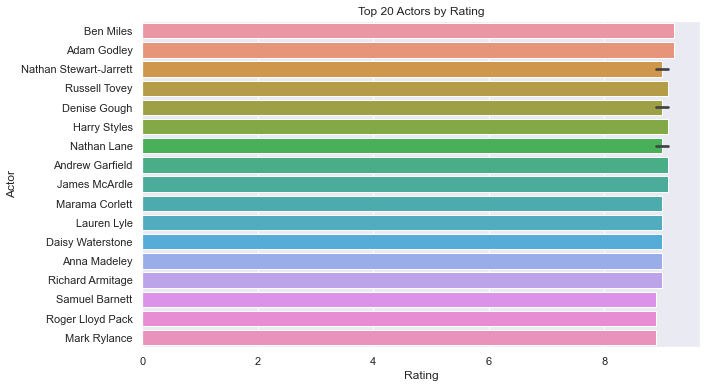

In [38]:
#The Best 20 Actors by Rating
best_actor = df_new.sort_values(by='Rating', ascending=False)[:20]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=best_actor.Actor, x=best_actor.Rating)
plt.xticks()
plt.xlabel('Rating')
plt.ylabel('Actor')
plt.title('Top 20 Actors by Rating')
plt.show()

In the graph below we see the top films according to the amount of votes:

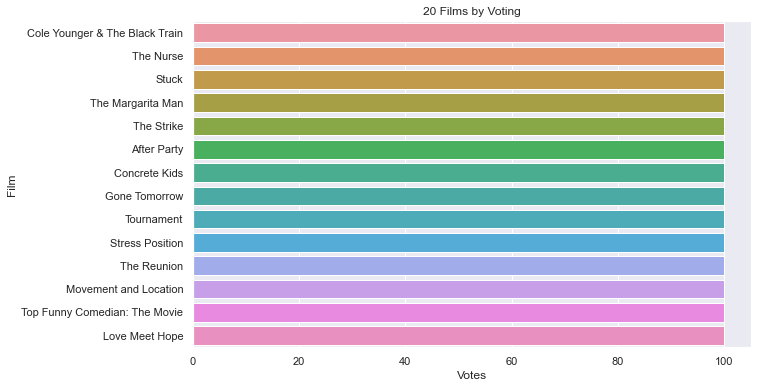

In [39]:
#The Best 20 Films by number of Votes
best_film = df_new.sort_values(by='Votes', ascending=True)[:20]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=best_film.Film, x=best_film.Votes)
plt.xticks()
plt.xlabel('Votes')
plt.ylabel('Film')
plt.title('20 Films by Voting')
plt.show()

Let’s then have a visual idea about how Film and Rating are linked in our dataset. Note that, as mentioned before, not only films are being considered, but also documentaries

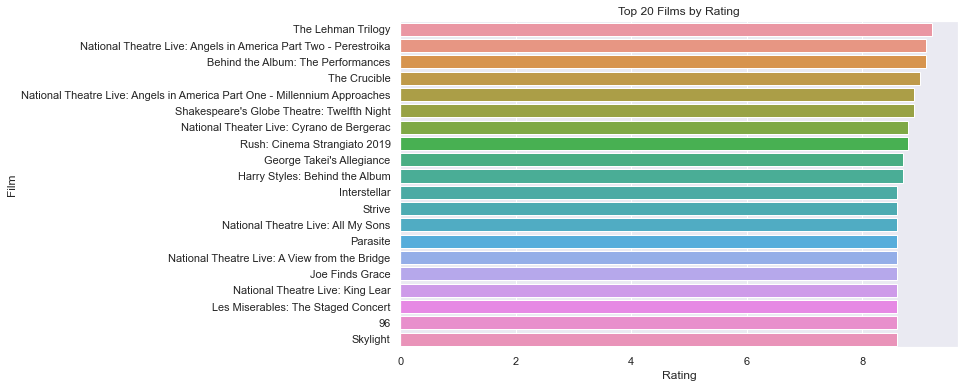

In [40]:
#The Best 20 Films by Ratings (ascending False)
best_film = df_new.sort_values(by='Rating', ascending=False)[['Film', 'Rating']].drop_duplicates()[:20]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=best_film.Film, x=best_film.Rating)
plt.xticks()
plt.xlabel('Rating')
plt.ylabel('Film')
plt.title('Top 20 Films by Rating')
plt.show()

We now have an overall view about how our numerical behaves in relation to the other:

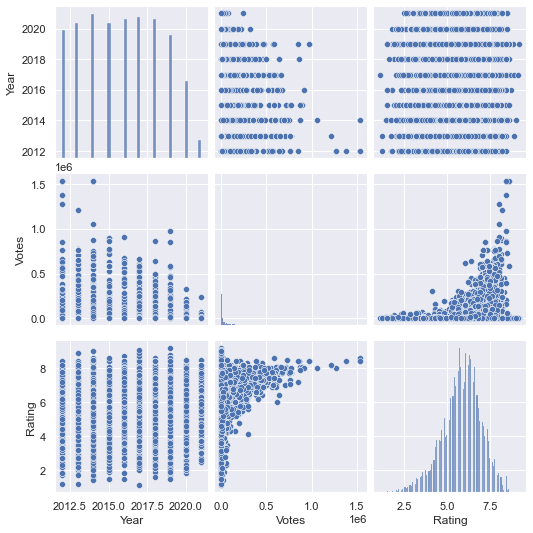

In [41]:
sns.pairplot(df_new)

# 5) Hypothesis 

<b>5.1 Defining groups</b>

As we demonstrated in the steps above, it is much more relevant to analyse information throughout the year 2000, which is when we can experience crucial changes in technologies and ways to make and consume films

That being said, let’s clean up our data a bit more by getting rid of the Actor and Actor ID variables, as we’re not going to use it for our hypothesis test and drop duplicate columns. In doing this, we focus on Films and Ratings and see how those perspectives reflect on our dataset.
In order to carry this analysis, let’s divide our dataset into 3 groups:

First things first let's have a look at the average rate for films released in the early 2000, precisely between 2000-2004:

In [42]:
list=["2000", "2001", "2002", "2003", "2004"]
series= df["Year"].isin(list)
df_hy=df[series]

In [43]:
df_hy.shape

(20976, 7)

In [44]:
df_hy.drop(['Actor','ActorID'], axis=1, inplace=True)

In [45]:
df_hy.drop_duplicates(subset=['Film'], inplace=True)

In [46]:
df_hy.shape

(3905, 5)

In [47]:
df_hy["Year"].value_counts()

2004    836
2001    808
2002    788
2000    754
2003    719
Name: Year, dtype: int64

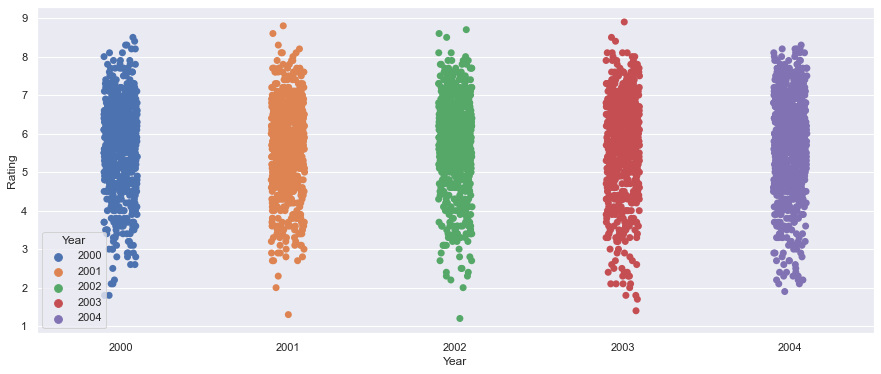

In [48]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="Year", y="Rating", data=df_hy,hue="Year",size=7, marker="o")

In [49]:
df_hy["Rating"].mean()

5.726069142125473

In [50]:
df_hy["Rating"].std()

1.19218834653748

Now let's have a look at the average rate for films released between 2005-2009:

In [51]:
list=["2005", "2006", "2007", "2008", "2009"]
series= df["Year"].isin(list)
df_hy2=df[series]

In [52]:
df_hy2.shape

(27003, 7)

In [53]:
df_hy2.drop(['Actor','ActorID'], axis=1, inplace=True)
df_hy2.drop_duplicates(subset=['Film'], inplace=True)

In [54]:
df_hy2.shape

(5229, 5)

In [55]:
df_hy2["Year"].value_counts()

2009    1140
2008    1069
2007    1068
2006    1037
2005     915
Name: Year, dtype: int64

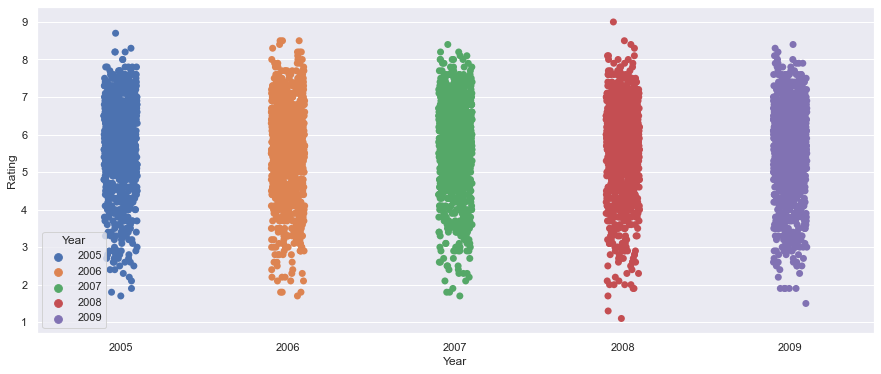

In [56]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="Year", y="Rating", data=df_hy2,hue="Year",size=7, marker="o")

In [57]:
df_hy2["Rating"].mean()

5.675310766877009

In [58]:
df_hy2["Rating"].std()

1.212953124853472

Now let's have a look at our latest range , which is the average rate for films released between 2017-2021:

In [59]:
list=["2017", "2018", "2019", "2020", "2021"]
series= df["Year"].isin(list)
df_hy3=df[series]

In [60]:
df_hy3.shape

(23213, 7)

In [61]:
df_hy3.drop(['Actor','ActorID'], axis=1, inplace=True)
df_hy3.drop_duplicates(subset=['Film'], inplace=True)

In [62]:
df_hy3.shape

(5158, 5)

In [63]:
df_hy3["Year"].value_counts()

2017    1453
2018    1413
2019    1312
2020     834
2021     146
Name: Year, dtype: int64

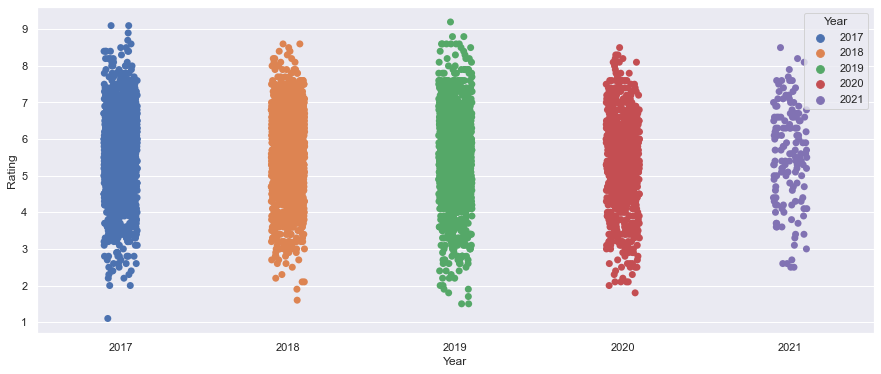

In [64]:
ig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="Year", y="Rating", data=df_hy3,hue="Year",size=7, marker="o")

In [65]:
df_hy3["Rating"].mean()

5.569367972082195

In [66]:
df_hy3["Rating"].std()

1.2069397403600544

<b>5.2 Compiling the groups</b>

Now let's compile the groups with the same cleaning and visualize it:

In [67]:
list=["2000", "2001", "2002", "2003", "2004","2005", "2006", "2007", "2008", "2009", "2017", "2018", "2019", "2020", "2021"]
series= df["Year"].isin(list)
df_sample=df[series]

In [68]:
df_sample.drop(['Actor','ActorID'], axis=1, inplace=True)
df_sample.drop_duplicates(subset=['Film'], inplace=True)

Our compiled group also follows The Central Limit Theorem:

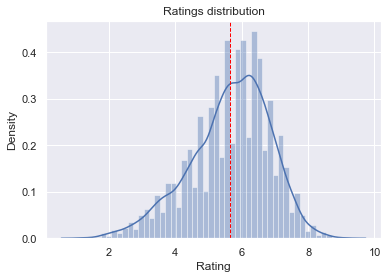

In [69]:
sns.distplot(df_sample['Rating'])
plt.axvline(df_sample['Rating'].values.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Ratings distribution');

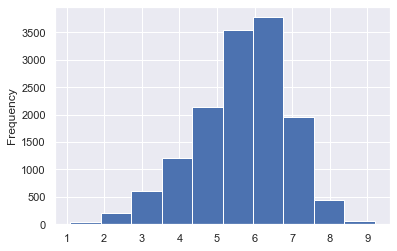

In [70]:
df_sample["Rating"].plot.hist();

In regards to our "new data" (compiled group), our overall mean is 5.65, standard deviation approximately 1.20 and 13989 films:

In [71]:
df_sample.shape

(13989, 5)

In [72]:
df_sample.mean()

Year       2009.778755
Votes     23241.937665
Rating        5.651762
dtype: float64

In [73]:
df_sample.head()

,Film,Year,Votes,Rating,FilmID
42,The Walker,2007,5256,5.8,tt0783608
43,Manderlay,2005,22622,7.3,tt0342735
44,These Foolish Things,2005,358,5.6,tt0439848
45,Howl's Moving Castle,2004,340480,8.2,tt0347149
46,Birth,2004,34949,6.1,tt0337876


<b>5.2 Setting our hypothesis</b>

Because of new technologies, films productions improved along the decade and we now have more CGI and special effects in the screen. Perform a hypotheses test to check whether or not difference exists somewehre between the early 2000 group(2000-2004), the middle (2005-2009) and the late 2000(2017-2021) rate, because of this.

Before performing our hypothesis test, let's see how ANOVA test works:

- Works by comparing the mean square between samples (MSB) to the mean square within sample (MSW).
- The values of MSB e MSW are calculated according to the number of groups and the total number of observations.
- We reject the null hypothesis H₀, if the computed F-static is greater than the critical F-statistic. The critical F-statistic is determined by the degrees of freedom and alpha α, value.

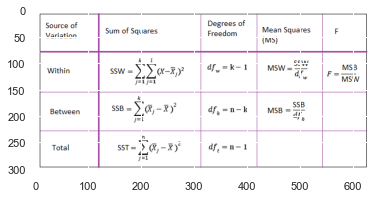

In [74]:
formula=mpimg.imread('data/one-way-ANOVA-formulas.png')
imgplot=plt.imshow(formula)
plt.show()

<b>Notation</b>
Term - Description
MS - Mean Square
SS - Sum of Squares
DF - Degrees of Freedom

<b>Hypothesis</b>:

Ho: There is no difference in ratings between the 3 groups

Ha: There is a difference in ratings between the 3 groups

In [75]:
#Global mean for the 3 groups
df_e2000=np.mean(df_hy["Rating"])
df_m2000=np.mean(df_hy2["Rating"])
df_l2000=np.mean(df_hy3["Rating"])
df_total=(df_e2000+df_m2000+df_l2000)/3


#Variance between groups
SSB=13989*((df_e2000-df_total)**2+(df_m2000-df_total)**2+(df_l2000-df_total)**2)

#Variance within each sample
SS_e2000=np.sum((df_hy['Rating']-df_e2000)**2)
SS_m2000=np.sum((df_hy2['Rating']-df_m2000)**2)
SS_l2000=np.sum((df_hy3['Rating']-df_l2000)**2)
SSW=SS_e2000+SS_m2000+SS_l2000

#Mean square values between groups
df_between=14 #15groups-1
MSB=SSB/df_between

#Mean square values within groups
df_within=13989-3  #total observations - C
MSW=SSW/df_within

#F-score
F_score=MSB/MSW
print('Calculated F_score is', F_score)

Calculated F_score is 8.609609053105594


In [76]:
df_within

13986

We can easily visualize all these calculated variables through the following table. After that, we will get our F critical value and carry out our analysis

In [77]:
data = [['Between Groups', '', '', '', '', '',''], ['Within Groups', '', '', '', '', '',''], ['Total', '', '', '', '', '','']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

anova_table['SS']['Between Groups'] = SSB
anova_table['SS']['Within Groups'] = SSW
anova_table['SS']['Total'] = SSB+SSW
anova_table['df']['Between Groups'] = df_between
anova_table['df']['Within Groups'] = df_within
anova_table['df']['Total'] = df_between+df_within
anova_table['MS']['Between Groups'] = MSB
anova_table['MS']['Within Groups']= MSW
anova_table['F']['Between Groups'] = F_score
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F_score, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

#Fcritical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = f.ppf(0.95, df_between, df_within)
# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,178.852,14,12.7751,8.60961,1.11022e-16,1.69248
Within Groups,20752.7,13986,1.48382,,,
Total,20931.6,14000,,,,


Our Fcrit is calculated considering alpha=0.05 (5%) and our critical area of a distribution is two- sided, which means that it is a two-tailed test (H₁: μ ≠ value). 

We can also experiment with a different significance level, selecting another one that reﬂects the consequences associated with Type 1 (false positives) and Type 2 Errors (false negatives). Since Type 2 error is more dangerous, we would increase the significance level to 0.10 from the standard 0.05 because we want to be cautious about failing to reject Ho when our null hypothesis is false:

In [78]:
#Confirming F critical value for alpha=0.05
print('F critical value for 0.05 significance value is', f.ppf(0.95, df_between, df_within))

F critical value for 0.05 significance value is 1.6924775763428612


In [79]:
#Finding F critical value for alpha=0.1
print('F critical value for 0.1 significance value is', f.ppf(0.9, df_between, df_within))

F critical value for 0.1 significance value is 1.5050692955483849


Let’s now visualize both information graphically:

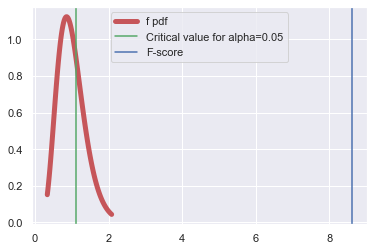

In [80]:
fig, ax=plt.subplots(1,1)
dfn, dfd=14,13986
x=np.linspace(f.ppf(0.01,dfn,dfd),f.ppf(0.99,dfn,dfd),100)
ax.plot(x,f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.95, label='f pdf')
plt.axvline(x=1.1102, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=8.60961, label='F-score')
plt.legend();

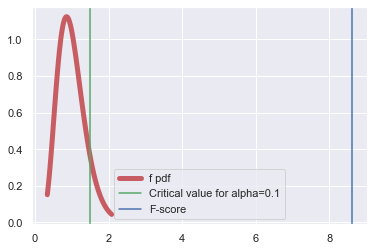

In [81]:
fig, ax=plt.subplots(1,1)
dfn, dfd=14,13986
x=np.linspace(f.ppf(0.01,dfn,dfd),f.ppf(0.99,dfn,dfd),100)
ax.plot(x,f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.9, label='f pdf')
plt.axvline(x=f.ppf(0.9, dfn, dfd), label='Critical value for alpha=0.1', color='g')
plt.axvline(x=8.60961, label='F-score')
plt.legend();

Since the value obtained by us is beyond the critical region and p-value also being very small as seen in the image, there is strong evidence for us to reject the null hypothesis.

In [82]:
alpha = 0.05
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 8.609609053105594  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


In [83]:
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 8.609609053105594  and critical value is: 1.6924775763428612
Null Hypothesis is rejected.


If Ho in ANOVA is rejected then we conclude that at least one of the population means are different. However, it doesn’t give us an insight to which means are different.

In other words, assuming our Ho is true there is only 0.0111022% probability that we will observe a F score of 13.10 from a sample belonging to a population which supports Ho.

# <span style='color:purple'> Second Section </span>

# 6. Correlation analysis

Throughout this section, we are going to analyse which variables whitin a dataset can be related and why.
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

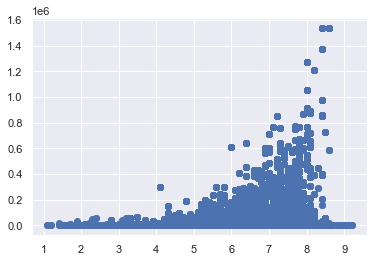

In [84]:
data1=df_new["Rating"]
data2=df_new["Votes"]
pyplot.scatter(data1, data2)

Before we look at calculating some correlation scores, let's have a look at our covariance. 
Covariance is the linear relationship summarized by two variables.

In [85]:
covariance=cov(data1, data2)
print(covariance)

[[1.26765309e+00 7.27299620e+04]
 [7.27299620e+04 2.08789132e+10]]


The covariance between the two main variables is 7.27. We can see that it is positive, suggesting the variables change in the same direction as we expect.

In order to interpretate this result, we are going to calculate the Pearson's correlation coefficient.
The Pearson correlation coefficient correlation coefficient is a number that summarizes the strength of the linear relationship between two data samples (Brownlee 2018) and it's the most common measure of correlation.

In [86]:
corr,_=pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.447


We can see that the two variables are positively correlated and that the correlation is 0.447. This suggests a moderate level of correlation.

In [87]:
df_new.corr(method="pearson")

,Year,Votes,Rating
Year,1.000000,-0.114809,-0.020715
Votes,-0.114809,1.000000,0.447053
Rating,-0.020715,0.447053,1.000000


In regards to a nonlinear relationship, we can calculate the Spearman's correlation coefficient to find if the relationship is stronger or weaker across the distribution of the variables.
Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample

In [88]:
corr,_=spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.561


The library **seaborn** provides a function called **heatmap** that allows us to visualize the correlation between variables.

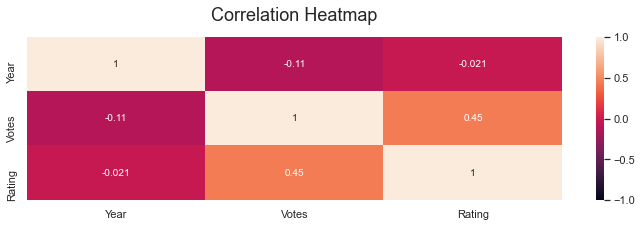

In [89]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(df_new.corr(),vmin=-1, vmax=1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

<b>Interpreting the correlation:</b>

* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. Where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

# <span style='color:purple'> Third Section </span>

# 7. Linear Regression model

We then go back to our df_sample, same used to perform our hypothesis test:

In [90]:
df_sample

,Film,Year,Votes,Rating,FilmID
42,The Walker,2007,5256,5.8,tt0783608
43,Manderlay,2005,22622,7.3,tt0342735
44,These Foolish Things,2005,358,5.6,tt0439848
45,Howl's Moving Castle,2004,340480,8.2,tt0347149
46,Birth,2004,34949,6.1,tt0337876
...,...,...,...,...,...
191828,A Snow White Christmas,2018,475,5.0,tt9274824
191841,After My Death,2017,242,6.3,tt7390044
191842,The Running Actress,2017,102,5.5,tt7341842
191848,Gunjan Saxena: The Kargil Girl,2020,24696,5.3,tt10350626


Paying special attention to the variables Votes per Year, we can have an ideia about the average amount of votes for each year:

In [91]:
round(df_sample.groupby('Year')['Votes'].mean().sort_values(ascending=False).iloc[:10],1)

Year
2004    32384.6
2003    31809.4
2002    29080.0
2008    28965.0
2007    27871.5
2001    27647.5
2006    26988.0
2005    26747.8
2009    26385.4
2000    24972.2
Name: Votes, dtype: float64

In [92]:
df_sample["Votes"].mean()

23241.93766530846

And also an idea about the average Rating per year:

In [93]:
round(df_sample.groupby('Year')['Rating'].mean().sort_values(ascending=False).iloc[:10],1)

Year
2002    5.8
2004    5.7
2005    5.7
2003    5.7
2001    5.7
2000    5.7
2007    5.7
2006    5.7
2008    5.6
2017    5.6
Name: Rating, dtype: float64

Let's now drop the variables Film and FilmID as our goal here is to show how Linear Regression model works even with few features:

In [94]:
df_sample.drop(['Film','FilmID'], axis=1, inplace=True)
df_sample

,Year,Votes,Rating
42,2007,5256,5.8
43,2005,22622,7.3
44,2005,358,5.6
45,2004,340480,8.2
46,2004,34949,6.1
...,...,...,...
191828,2018,475,5.0
191841,2017,242,6.3
191842,2017,102,5.5
191848,2020,24696,5.3


Matplotlib module was used to plot the graph between Rating and Votes, as unfortunately our dataset doesn’t have the other features able to explore further this prediction step. But, as mentioned previously, the goal here is to show how Linear Regression model works even with few features.

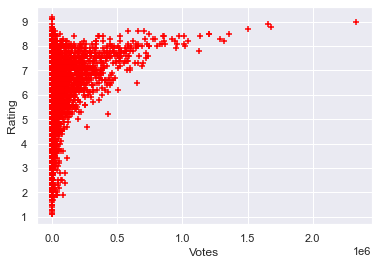

In [95]:
plt.scatter(df_sample["Votes"], df_sample["Rating"], marker="+", color="red")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

Finally, let’s write a regression algorithm to predict Ratings against their Votes.

In [96]:
reg=LinearRegression()
reg.fit(df[['Votes']],df['Rating'])
LinearRegression()

LinearRegression()

Our Linear Regression model is trained by the training data and it is ready to predict values. Let us find the coefficient and intercept:

In [97]:
reg.coef_

array([3.0753364e-06])

In [98]:
reg.intercept_

5.820709583616512

Based on that, our regression line is:

In [99]:
y=3.0753364e-06*x+5.820709583616512

Let us draw this line on our data:

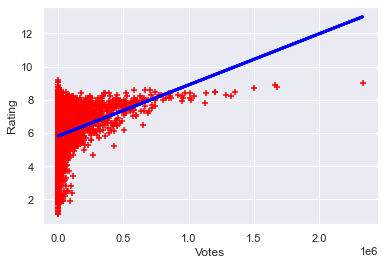

In [100]:
plt.scatter(df_sample["Votes"], df_sample["Rating"], marker="+", color="red")
plt.plot(df_sample[["Votes"]],reg.predict(df_sample[["Votes"]]), color="blue", linewidth=3)
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

The calculated average of votes throughout 2000 to 2021 is 23,242 votes. Having this in mind, let’s now use our simple regression model to predict which average Rating our data will generate considering that for 2022 we will have an average of 50000 votes.

In [101]:
reg.predict([[50000]])

array([5.9744764])

We could have also used the equation of line viz.

* y = mx + c
* m = 3.0753364e-06
* c = 5.820709583616512
* x = 50000
* y = 3.0753364e-06*50000 + (5.820709583616512)
* y = 6.005

It is quite a good number given that we have used just one variable viz Votes, and it reflects on the result of the Rating. Of course, this model is extremely simple and we have just considered a single variable. There can be many variables that might affect the movie earnings but that is left for the next article.